### 접근
- DP[i][j] = `i-1`번째 줄까지의 두부를 자르고, 현재 줄의 두부 상태가 `j`일 때 최대 가격
- 1648(격자판 채우기)와 다르게 이번엔 i번째 줄을 빈틈없이 채울 필요가 없다.
  - 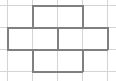
  - 이런식으로 자르는 것이 정답일 수 있다.

### 풀이
- 더이상 참을 수 없다. 그냥 잘 알려진 풀이를 이해하는게 더 빨리 풀릴 것 같다.
- DP[i][j] = `i`번째 칸 뒤 $M$개의 두부가 `j`상태로 잘려있을 때 얻을 수 있는 두부의 최대 가격
  - i칸 뒤 M칸을 보고 두부를 1x2로 자르므로 현재 칸에서 해당 모양으로 자르기로 결정했을 때 모든 경우를 고려할 수 있다.
  - 잘라야 하는 모양이 달라진다면 봐야하는 칸의 개수도 늘어날 것이다. 예를들어 세로로 3칸 잘라야 한다면 뒤의 $2M$칸을 봐야하겠지.

In [ ]:
PRICE = [[10, 8, 7, 5, 1], [8, 6, 4, 3, 1], [7, 4, 3, 2, 1], [5, 3, 2, 2, 1], [1, 1, 1, 1, 0]]
def go(G, N, M, DP, i, B) :
  if i >= N * M :
    return 0

  if DP[i][B] != -1 :
    return DP[i][B]

  cmp = go(G, N, M, DP, i + 1, B >> 1) #자르지 않고 지나가는 경우
  DP[i][B] = max(DP[i][B], cmp)

  if B & 1 == 0 : #자르기로 결정한 경우 현재 칸은 비어있어야 한다.
    if i + M < N * M: #세로로 자르는 경우(아래칸이 범위를 벗어난 곳이 아닌 경우)
      cmp = go(G, N, M, DP, i + 1, B >> 1 | (1 << (M-1))) 
      DP[i][B] = max(DP[i][B], cmp + PRICE[G[i // M][i % M]][G[(i + M) // M][(i + M) % M]])
    
    if i % M != (M-1) and B & 2 == 0 : #가로로 자르는 경우(다음 칸이 다음줄의 첫번째로 넘어간다면 가로 모양으로 자르는 것이 아
      # 니다)
      cmp = go(G, N, M, DP, i + 2, B >> 2)
      DP[i][B] = max(DP[i][B], cmp + PRICE[G[i // M][i % M]][G[(i + 1) // M][(i + 1) % M]])
  return DP[i][B]

def sol() :
  N, M = map(int, input().split()) #가로 세로
  G = [[*map(lambda x: ord(x) - 65 if x != 'F' else 4, input().rstrip())] for _ in range(N)]
  DP = [[-1] * (1 << M) for _ in range(N * M)] #DP[i][j] = i번째 칸 뒤 M개의 두부의 잘린 상태가 j일 때 최대 가격
  go(G, N, M, DP, 0, 0)
  print(DP[0][0])
  
sol()